# Exploring Amsterdam Airbnb Data

## Airbnb

Airbnb is a global company which operates an online marketplace for hospitality sector. It is a platform business that provides and guides an opportunity to link two groups - the hosts and the guests. Anybody with an open room or free space can become a host on Airbnb and offer it to global community.

## Objective

To provide some exploratory analysis of the data set and to use some machine learning models and techniques to predict the variable price.  You can find the dataset from Airbnb: http://insideairbnb.com/get-the-data.html.

## Importing Data

In [1]:
#installing dependencies
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/deepaks/Downloads/listings.csv", index_col = "id", low_memory = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20677 entries, 2818 to 37590988
Columns: 105 entries, listing_url to reviews_per_month
dtypes: float64(23), int64(20), object(62)
memory usage: 16.7+ MB


## Cleaning and Pre-processing

The dataset contains 20677 rows and 105 columns. The dataset  has quite a few text columns of all the different description fields that can be filled in for an Airbnb listing. Due to time constraints I did not do any natural language processing (NLP) in this model, so all these features were dropped.

In [3]:
pd.set_option('display.max_columns', None) # show all column names display
df.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,NaN,NaN,https://a0.muscache.com/im/pictures/10272854/8...,NaN,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,NaN,Amsterdam,North Holland,NaN,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.36575,4.94142,f,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",NaN,$59.00,NaN,"$1,500.00",$200.00,$60.00,1,$20.00,3,15,3,3,15,15,3.0,15.0,today,t,8,18,43,89,2019-08-09,267,30,2009-03-30,2019-08-05,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12
20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,Check-in time from 2pm till 10pm (But it doesn...,No need to use any transport! All is within a ...,NaN,"No curfew, free entrance 27/7 with your own ke...",This studio/room takes entire floor and has it...,NaN,NaN,https://a0.muscache.com/im/pictures/69979664/3...,NaN,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Nether

We will drop columns that are empty, have an extensions _url as we are not analysing the pictures(out of scope) , containing text, certain columns which does not contribute to predict the variable price while keeping the rest.

In [4]:
cols_to_keep=['host_since','host_is_superhost','host_identity_verified','host_response_rate','host_acceptance_rate','host_listings_count','neighbourhood_cleansed','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','has_availability','availability_30','availability_60','availability_90','availability_365','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','cancellation_policy','calculated_host_listings_count','reviews_per_month']

In [5]:
listings = df[cols_to_keep]

Examining the **null/missing values** to determine whether to drop or replace them

In [6]:
listings.isnull().sum()

host_since                           12
host_is_superhost                    12
host_identity_verified               12
host_response_rate                 8541
host_acceptance_rate              20677
host_listings_count                  12
neighbourhood_cleansed                0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                             6
bedrooms                              8
beds                                  8
bed_type                              0
amenities                             0
price                                 0
security_deposit                   6202
cleaning_fee                       3721
guests_included                       0
extra_people                          0
minimum_nights                        0
maximum_nights                        0
number_of_reviews                     0


12 rows with missing host_since and 12 rows with missing host_listings_cout can be dropped

In [7]:
listings.dropna(subset=['host_since','host_listings_count'],inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Drop the following:
* host_acceptance_rate: is NAN
* host_response_rate: this value could be useful but contains high percentage of N/A 

In [8]:
listings=listings.drop(['host_acceptance_rate','host_response_rate'],axis=1)

Asumming the rest of the null values means that the property doesn't have the coressponding variable or the missing categorical variable is false we replace it with zero

In [9]:
cols=['bathrooms','bedrooms','beds','security_deposit','cleaning_fee','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month','host_is_superhost','host_identity_verified','cancellation_policy']
listings[cols] = listings[cols].fillna(0)

In [10]:
# Replacing columns with f/t with 0/1
listings.replace({'f': 0, 't': 1}, inplace=True)

In [11]:
listings.isnull().sum()

host_since                        0
host_is_superhost                 0
host_identity_verified            0
host_listings_count               0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
bed_type                          0
amenities                         0
price                             0
security_deposit                  0
cleaning_fee                      0
guests_included                   0
extra_people                      0
minimum_nights                    0
maximum_nights                    0
number_of_reviews                 0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365            

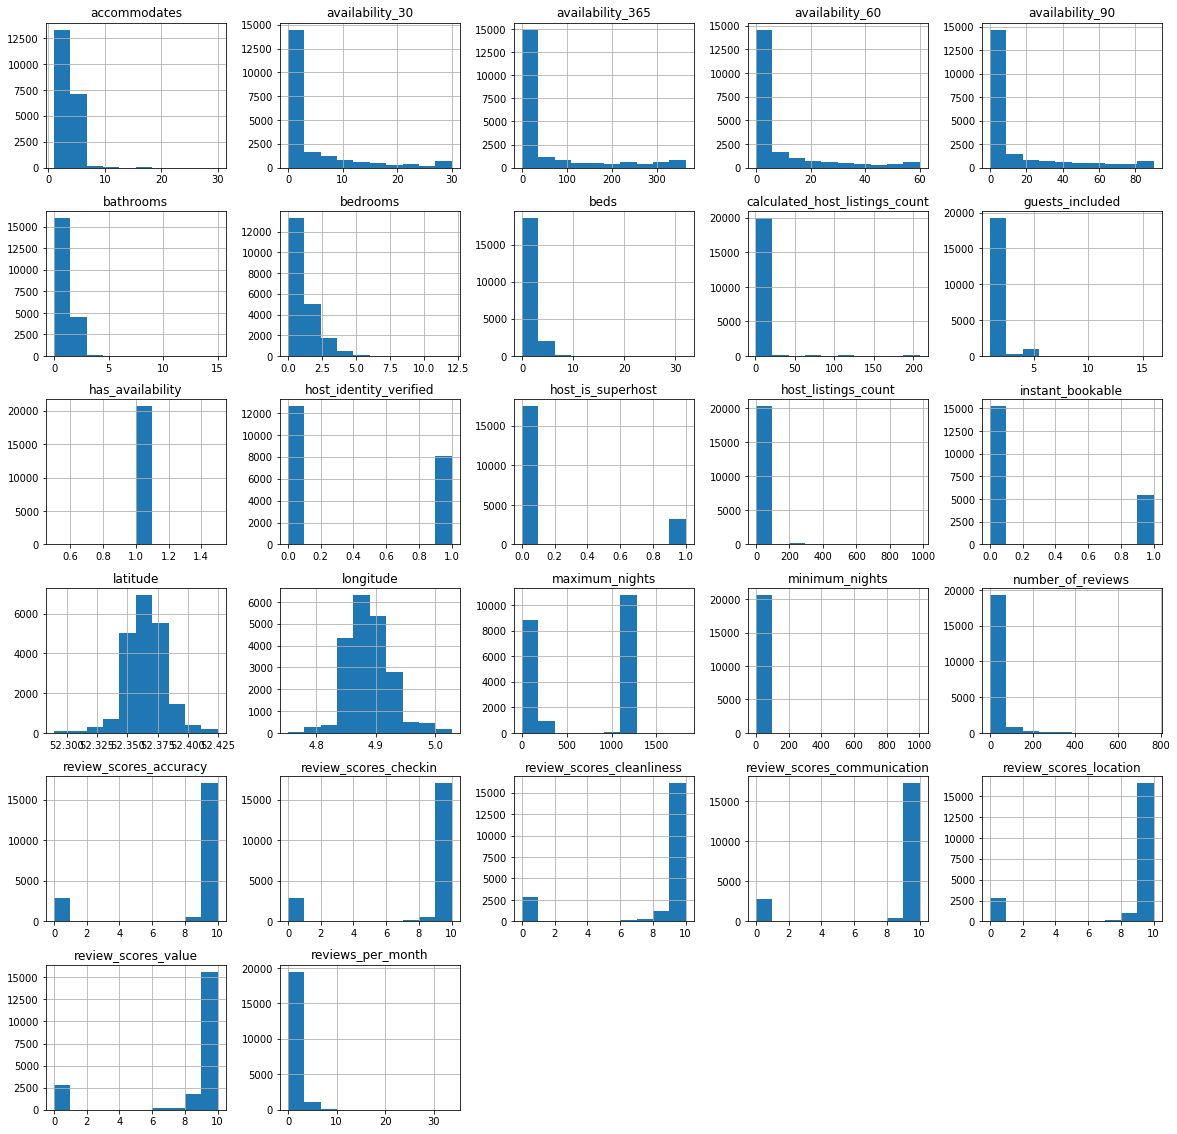

In [12]:
listings.hist(figsize=(20,20));

From above we can see there are still columns with one category we can drop them

In [13]:
listings.drop('has_availability',axis=1,inplace=True)

Exploring certain variables more in detail to convert their data type or to consolidate their categories

**host_since**

In [14]:
from datetime import datetime

# Converting to datetime
listings.host_since = pd.to_datetime(listings.host_since) 

# Calculating the number of days
listings['host_days_active'] = (datetime(2019, 8, 8) - listings.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(listings['host_days_active'].mean(),0))
print("Median days as host:", listings['host_days_active'].median())

# Replacing null values with the median
listings.host_days_active.fillna(listings.host_days_active.median(), inplace=True)

Mean days as host: 1612.0
Median days as host: 1649.0


**property_type**

There are a large number of categories with only a few listings. The categories 'apartment', 'house' and 'other' will be used, as most properties can be classified as either apartments or houses.

In [15]:
listings.property_type.value_counts()

Apartment                 15824
House                      1638
Townhouse                   671
Bed and breakfast           549
Loft                        392
Boat                        351
Condominium                 334
Houseboat                   289
Guest suite                 146
Aparthotel                  119
Serviced apartment           69
Guesthouse                   49
Boutique hotel               43
Villa                        39
Other                        39
Hostel                       29
Hotel                        23
Tiny house                   12
Cottage                      12
Cabin                        10
Camper/RV                     5
Bungalow                      3
Chalet                        3
Casa particular (Cuba)        3
Yurt                          2
Barn                          2
Campsite                      1
Castle                        1
Lighthouse                    1
Hut                           1
Nature lodge                  1
Tent    

In [16]:
# Replacing categories that are types of houses or apartments
listings.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
listings.loc[~listings.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

**accommodates/bathrooms/bedrooms/bed_type**

Most listings have the same bed type(real bed) so this feature can be dropped. We make no more changes to accommodates, bedrooms and bathrooms as they may be directly proportional to higher prices

In [17]:
listings.accommodates.value_counts()

2     11190
4      6326
3      1664
1       486
6       411
5       389
8        80
7        49
16       30
10       12
12       11
9         8
14        3
11        3
18        1
17        1
30        1
Name: accommodates, dtype: int64

In [18]:
listings.bedrooms.value_counts()


1.0     12155
2.0      4998
3.0      1735
0.0      1160
4.0       503
5.0        81
6.0        11
7.0         6
12.0        6
10.0        4
8.0         4
11.0        1
9.0         1
Name: bedrooms, dtype: int64

In [19]:
listings.bathrooms.value_counts()

1.0     15920
1.5      3271
2.0       966
2.5       252
3.0        81
0.5        75
3.5        42
0.0        34
4.0        15
5.0         3
4.5         2
8.0         2
15.0        1
5.5         1
Name: bathrooms, dtype: int64

In [20]:
listings.bed_type.value_counts()

Real Bed         20486
Pull-out Sofa      119
Futon               40
Airbed              14
Couch                6
Name: bed_type, dtype: int64

In [21]:
listings.drop('bed_type', axis=1, inplace=True)

**amenities**

Amenities is a list of additional features in the property, e.g. whether it has a TV or parking. Examples are below:

In [22]:
# Example of amenities listed
listings.amenities[:1].values

array(['{Internet,Wifi,"Paid parking off premises","Buzzer/wireless intercom",Heating,Washer,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door","24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50","Private entrance","Hot water","Bed linens","Extra pillows and blankets","Single level home","Garden or backyard","No stairs or steps to enter","Flat path to guest entrance","Well-lit path to entrance","No stairs or steps to enter","Accessible-height bed","No stairs or steps to enter","Host greets you","Handheld shower head","Paid parking on premises"}'],
      dtype=object)

In [23]:

# Creating a set of all possible amenities
amenities_list = list(listings.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach essentials',
 'Beachfront',
 'Bed linens',
 'Breakfast',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Cooking basics',
 'Crib',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'EV charger',
 'Electric profiling bed',
 'Elevator',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Extra space around bed',
 'Family/kid friendly',
 'Fire extinguisher',
 'Fireplace guards',
 'Firm mattress',
 'First aid kit',
 'Fixed grab bars for shower',
 'Fixed grab bars for toilet',
 'Flat path to guest entrance',
 


In the list above, some amenities are more important than others (e.g. a Carbon monoxide detector is more likely to increase price than a Crib), and some are likely to be fairly uncommon (e.g. 'Electric profiling bed'). A selection of the more important amenities will be extracted. These will be further investigated in the EDA section. For example, if it turns out that almost all properties have/do not have a particular amenity, that feature will not be very useful in helping explain differences in prices.

In [24]:
listings.loc[listings['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
listings.loc[listings['amenities'].str.contains('Air conditioning'), 'air_conditioning'] = 1
listings.loc[listings['amenities'].str.contains('BBQ grill'), 'bbq'] = 1
listings.loc[listings['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
listings.loc[listings['amenities'].str.contains('Beachfront|Lake access|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
listings.loc[listings['amenities'].str.contains('Cat(s)|Dog(s)|Other pet(s)|Pets allowed'), 'pets_allowed'] = 1
listings.loc[listings['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
listings.loc[listings['amenities'].str.contains('TV'), 'tv'] = 1
listings.loc[listings['amenities'].str.contains('Coffee maker'), 'coffee_machine'] = 1
listings.loc[listings['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
listings.loc[listings['amenities'].str.contains('Dishwasher|Dryer|Washer|Iron'), 'white_goods'] = 1
listings.loc[listings['amenities'].str.contains('Elevator'), 'elevator'] = 1
listings.loc[listings['amenities'].str.contains('Gym'), 'gym'] = 1
listings.loc[listings['amenities'].str.contains('Family/kid friendly|Children'), 'child_friendly'] = 1
listings.loc[listings['amenities'].str.contains('Free parking on premises|Free street parking'), 'parking'] = 1
listings.loc[listings['amenities'].str.contains('Garden or backyard'), 'outdoor_space'] = 1
listings.loc[listings['amenities'].str.contains('Hot tub|Pool'), 'hot_tub_or_pool'] = 1
listings.loc[listings['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
listings.loc[listings['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
listings.loc[listings['amenities'].str.contains('Smoke detector|Carbon monoxide detector'), 'smoke_or_CO_detector'] = 1
listings.loc[listings['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
listings.loc[listings['amenities'].str.contains('Safety card'), 'safety_card'] = 1
listings.loc[listings['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
listings.loc[listings['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
listings.loc[listings['amenities'].str.contains('Wheelchair|Accessible'), 'accessible'] = 1

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [25]:
listings.head()

,host_since,host_is_superhost,host_identity_verified,host_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,availability_30,availability_60,availability_90,availability_365,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month,host_days_active,check_in_24h,air_conditioning,bbq,balcony,nature_and_views,pets_allowed,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,hot_tub_or_pool,internet,long_term_stays,smoke_or_CO_detector,private_entrance,safety_card,self_check_in,smoking_allowed,accessible
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2818,2008-09-24,1,0,1.0,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Apartment,Private room,2,1.5,1.0,2.0,"{Internet,Wifi,""Paid parking off premises"",""Bu...",$59.00,$200.00,$60.00,1,$20.00,3,15,267,8,18,43,89,10.0,10.0,10.0,10.0,10.0,10.0,1,strict_14_with_grace_period,1,2.12,3970.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0
20168,2009-12-02,0,0,2.0,Centrum-Oost,52.36509,4.89354,House,Private room,2,1.0,1.0,1.0,"{TV,Internet,Wifi,""Paid parking off premises"",...",$80.00,0,0,2,$0.00,1,1000,283,0,8,34,124,9.0,10.0,10.0,10.0,10.0,9.0,0,strict_14_with_grace_period,2,2.46,3536.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
25428,2009-11-20,0,0,2.0,Centrum-West,52.37297,4.88339,Apartment,Entire home/apt,3,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",$125.00,$300.00,$40.00,2,$10.00,14,60,3,4,6,16,75,10.0,10.0,10.0,10.0,10.0,10.0,0,strict_14_with_grace_period,2,0.16,3548.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
27886,2010-03-23,1,1,1.0,Centrum-West,52.38673,4.89208,Other,Private room,2,1.0,1.0,1.0,"{TV,Internet,Wifi,Breakfast,Heating,""Smoke det...",$150.00,$0.00,$0.00,1,$0.00,2,730,195,6,13,26,66,10.0,10.0,10.0,10.0,10.0,10.0,1,strict_14_with_grace_period,1,2.11,3425.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN
28871,2010-05-13,1,1,3.0,Centrum-West,52.36719,4.89092,Apartment,Private room,2,1.0,1.0,1.0,"{Internet,Wifi,""Pets live on this property"",Ca...",$75.00,0,0,1,$0.00,2,1825,283,2,5,12,138,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,3,2.59,3374.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN


In [26]:
listings.iloc[:,37:].columns

Index(['check_in_24h', 'air_conditioning', 'bbq', 'balcony',
       'nature_and_views', 'pets_allowed', 'breakfast', 'tv', 'coffee_machine',
       'cooking_basics', 'white_goods', 'elevator', 'gym', 'child_friendly',
       'parking', 'outdoor_space', 'hot_tub_or_pool', 'internet',
       'long_term_stays', 'smoke_or_CO_detector', 'private_entrance',
       'safety_card', 'self_check_in', 'smoking_allowed', 'accessible'],
      dtype='object')

One way to reduce the number of features (to avoid the curse of dimensionality) is to remove the amenities which add relatively little information, or are relatively unhelpful in differentiating between different listings. Amenity features where either the true or the false category contains fewer than 10% of listings will be removed.

In [27]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = listings.iloc[:,37:].columns
listings[cols_to_replace_nulls] = listings[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in listings.iloc[:,37:].columns:
    if listings[col].sum() < len(listings)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
listings.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
listings.drop('amenities', axis=1, inplace=True)

['check_in_24h', 'air_conditioning', 'bbq', 'nature_and_views', 'pets_allowed', 'breakfast', 'elevator', 'gym', 'outdoor_space', 'hot_tub_or_pool', 'self_check_in', 'smoking_allowed', 'accessible']


In [28]:
listings.iloc[:,36:].columns

Index(['balcony', 'tv', 'coffee_machine', 'cooking_basics', 'white_goods',
       'child_friendly', 'parking', 'internet', 'long_term_stays',
       'smoke_or_CO_detector', 'private_entrance', 'safety_card'],
      dtype='object')

**price**

Price will be converted to an integer - currently it is a string because there is a currency signm

In [29]:
listings.price = listings.price.str.replace("$", "")
listings.price = listings.price.str.replace(",", "")
listings.price = listings.price.astype(float)

**security_deposit**

As with price, this will be converted to an integer - currently it is a string because there is a currency sign.

Having a missing value for security deposit is functionally the same as having a security deposit of $0, so missing values will be replaced with 0

In [30]:
listings.security_deposit = listings.security_deposit.str.replace("$", "")
listings.security_deposit = listings.security_deposit.str.replace(',', "")
listings.security_deposit = listings.security_deposit.astype(float)

**cleaning_fee**

As with price, this will be converted to an integer - currently it is a string because there is a currency sign.

In [31]:
listings.cleaning_fee = listings.cleaning_fee.str.replace("$", "")
listings.cleaning_fee = listings.cleaning_fee.str.replace(",", "")
listings.cleaning_fee = listings.cleaning_fee.astype(float)

In [32]:
cols=['security_deposit','cleaning_fee']
listings[cols] = listings[cols].fillna(0.0)

**extra_people**

As with price, this will be converted to an integer - currently it is a string because there is a currency sign

In [33]:
listings.extra_people = listings.extra_people.str.replace("$", "")
listings.extra_people = listings.extra_people.str.replace(",", "")
listings.extra_people = listings.extra_people.astype(float)

**review rating columns**

Checking the distributions of the review ratings columns to see if they are in scale

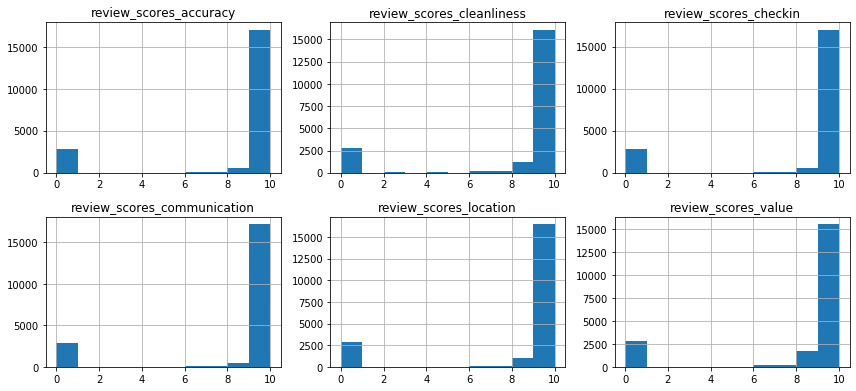

In [34]:
variables_to_plot = list(listings.columns[listings.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    listings[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

## Exploratory Data Analysis

Amsterdam hosts joining Airbnb has been high from mid 2013 to 2016

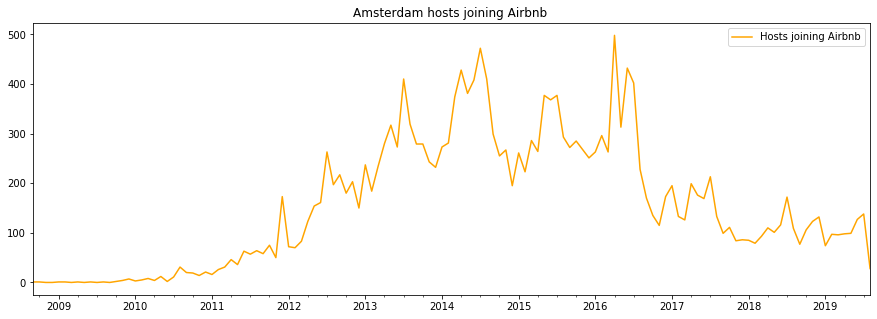

In [35]:
plt.figure(figsize=(15,5))
listings.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='orange')
plt.title('Amsterdam hosts joining Airbnb ')
plt.legend()
plt.xlim('2008-09-24', '2019-08-08') # Limiting to whole months #host_since(first date & last date of the data set)
plt.xlabel('')
plt.ylabel('')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1291: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]


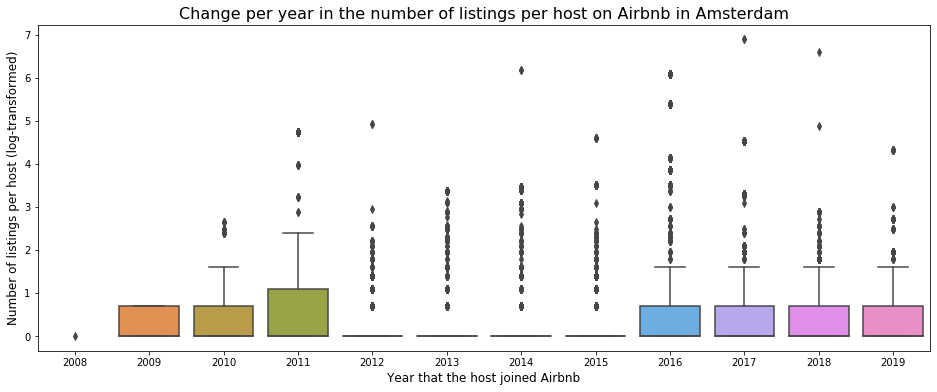

In [36]:
plt.figure(figsize=(16,6))
sns.boxplot(listings.host_since.dt.year, np.log(listings.host_listings_count))
plt.xlabel('Year that the host joined Airbnb', fontsize=12)
plt.ylabel('Number of listings per host (log-transformed)', fontsize=12)
plt.title('Change per year in the number of listings per host on Airbnb in Amsterdam', fontsize=16)
plt.show()

In [37]:
# List of the largest host_listings_count and the year the host joined Airbnb
listings.sort_values('host_listings_count').drop_duplicates('host_listings_count').tail(10)[['host_since', 'host_listings_count']]

,host_since,host_listings_count
id,,
30850224,2017-01-30,93.0
19368822,2015-10-16,99.0
14675595,2011-12-02,115.0
32852286,2018-07-12,131.0
27144277,2012-07-07,139.0
13984222,2016-04-05,217.0
23013270,2016-06-06,435.0
20613476,2014-08-12,486.0
37551929,2018-03-12,739.0


In [38]:
print("Mean nightly price of listings in each year on Airbnb in Amsterdam:")
print(round(listings.set_index('host_since').price.resample('YS').mean(),2))

Mean nightly price of listings in each year on Airbnb in Amsterdam:
host_since
2008-01-01     79.50
2009-01-01    148.39
2010-01-01    175.92
2011-01-01    160.32
2012-01-01    161.03
2013-01-01    156.17
2014-01-01    156.24
2015-01-01    153.04
2016-01-01    158.10
2017-01-01    153.42
2018-01-01    172.59
2019-01-01    200.67
Freq: AS-JAN, Name: price, dtype: float64


## Numerical Features

In [39]:
listings.describe()

,host_is_superhost,host_identity_verified,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,availability_30,availability_60,availability_90,availability_365,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,host_days_active,balcony,tv,coffee_machine,cooking_basics,white_goods,child_friendly,parking,internet,long_term_stays,smoke_or_CO_detector,private_entrance,safety_card
count,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000,20665.000000
mean,0.155529,0.390177,7.010888,52.365280,4.889567,2.879264,1.158311,1.453908,1.828696,159.100073,157.691217,32.698621,1.459279,11.328768,3.547641,617.636245,23.291459,3.782434,7.683426,12.419260,54.107089,8.363465,8.175901,8.400726,8.450327,8.177643,7.919477,0.263634,4.927317,0.863968,1612.134914,0.196806,0.783644,0.303508,0.286039,0.885023,0.416985,0.118752,0.976530,0.119090,0.811420,0.320203,0.118074
std,0.362417,0.487802,37.729548,0.016351,0.035954,1.315130,0.380633,0.895323,1.408102,162.500281,328.762204,27.349855,0.935698,23.153752,18.695770,537.973148,48.628025,7.216388,14.485520,22.927073,99.483930,3.389274,3.349985,3.403875,3.411562,3.324530,3.244132,0.440614,22.890140,1.303685,717.148388,0.397594,0.411770,0.459784,0.451919,0.319002,0.493072,0.323504,0.151393,0.323903,0.391184,0.466566,0.322704
min,0.000000,0.000000,0.000000,52.289270,4.753120,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,52.355140,4.863880,2.000000,1.000000,1.000000,1.000000,99.000000,0.000000,10.000000,1.000000,0.000000,2.000000,21.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.000000,1.000000,0.140000,1147.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,52.364620,4.887030,2.000000,1.000000,1.000000,1.000000,130.000000,0.000000,30.000000,1.000000,0.000000,2.000000,1125.000000,9.000000,0.000000,0.000000,0.000000,1.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,0.000000,1.000000,0.430000,1649.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,2.000000,52.375180,4.909260,4.000000,1.000000,2.000000,2.000000,180.000000,250.000000,50.000000,2.000000,20.000000,3.000000,1125.000000,23.000000,4.000000,8.000000,13.000000,50.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,2151.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,980.000000,52.424710,5.027690,30.000000,15.000000,12.000000,32.000000,8915.000000,4736.000000,531.000000,16.000000,280.000000,1001.000000,1825.000000,767.000000,30.000000,60.000000,90.000000,365.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,208.000000,33.670000,3970.000000,1.000000,1.000

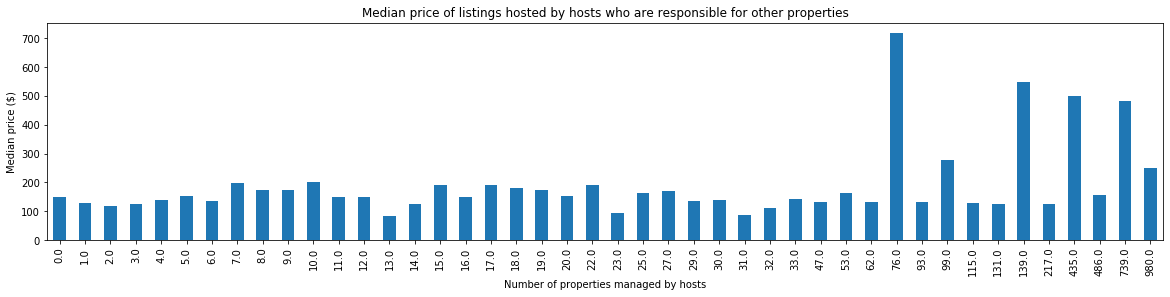

In [40]:
# Median price for different host listing counts
plt.figure()
listings.groupby('host_listings_count').price.median().plot(figsize=(20,4), kind='bar')
plt.title('Median price of listings hosted by hosts who are responsible for other properties')
plt.xlabel('Number of properties managed by hosts')
plt.ylabel('Median price ($)');

In [41]:
print("Median number of listings per host:", int(listings.host_listings_count.median()))
print("Mean number of listings per host:", int(round(listings.host_listings_count.mean())))
print(f"{int(round(100*len(listings[listings.host_listings_count == 1])/len(listings)))}% of listings are from hosts with one listing.")

Median number of listings per host: 1
Mean number of listings per host: 7
72% of listings are from hosts with one listing.


In [42]:
print(f"Nightly advertised prices range from ${min(listings.price)} to ${max(listings.price)}.")

Nightly advertised prices range from $0.0 to $8915.0.


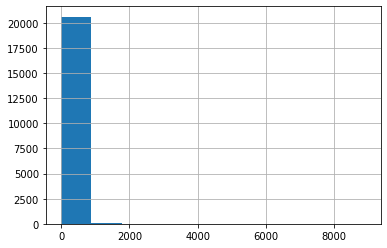

In [43]:
# Distribution of prices 
listings.price.hist()

most of the prices fall within 2000

(0, 3000)

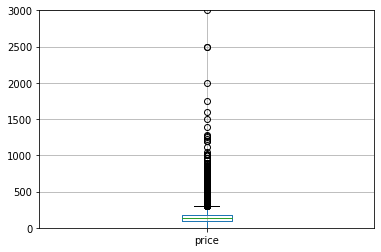

In [44]:
ax = listings.boxplot('price')
ax.set_ylim(0,3000)

(0, 200)

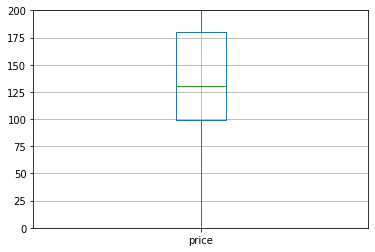

In [45]:
ax = listings.boxplot('price')
ax.set_ylim(0,200)

In [46]:
listings['price'].value_counts(bins=8)

(-8.915999999999999, 1114.375]    20641
(1114.375, 2228.75]                  13
(2228.75, 3343.125]                   4
(4457.5, 5571.875]                    3
(7800.625, 8915.0]                    2
(6686.25, 7800.625]                   1
(5571.875, 6686.25]                   1
(3343.125, 4457.5]                    0
Name: price, dtype: int64

We can drop the rows containing the outliers that is prices above 2000

In [47]:
listings.drop(listings[listings.price > 2000].index, inplace=True)

Number of people accommodated

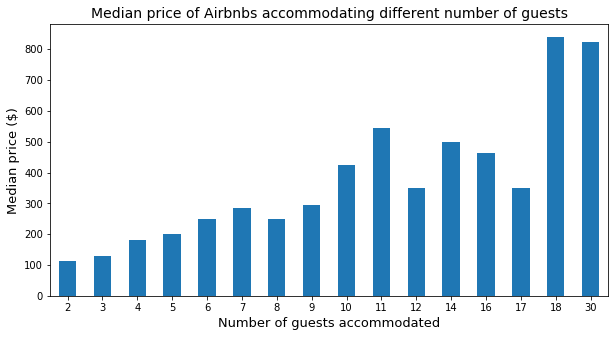

In [48]:
plt.figure(figsize=(10,5))
listings.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price ($)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

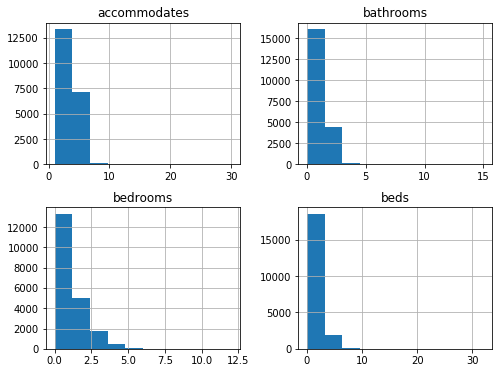

In [49]:
listings[['accommodates', 'bathrooms', 'bedrooms', 'beds']].hist(figsize=(8,6));

With regards to the availability, the graphs below show that the price does have some affect on the availability of the Airbnb rental properties in Amsterdam. Properties available for lesser days have a lower average price compared to properties which are available more days in the next 90 days.

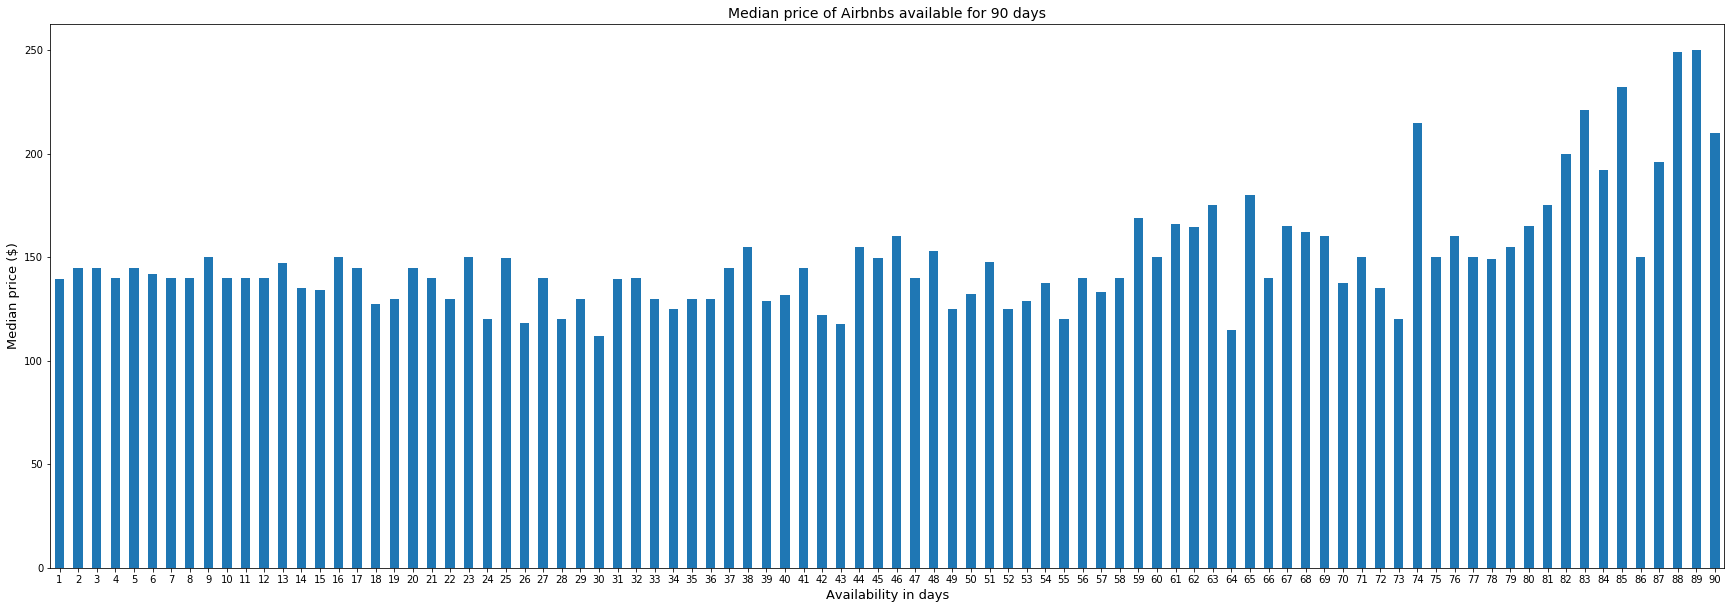

In [50]:
#availability 
plt.figure(figsize=(30,10))
listings.groupby('availability_90').price.median().plot(kind='bar')
plt.title('Median price of Airbnbs available for 90 days', fontsize=14)
plt.xlabel('Availability in days', fontsize=13)
plt.ylabel('Median price ($)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

## Categorical features

Categorical features will be explored and plotted, to gain insights and to determine whether or not they should be included in the final model.


Property and room types

In [51]:
def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    A figure size can optionally be specified.
    """
    plt.figure(figsize=figsize)
    listings[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

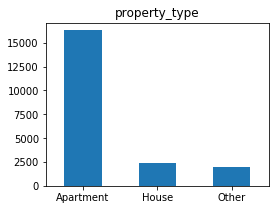

Apartment    0.788080
House        0.115135
Other        0.096785
Name: property_type, dtype: float64


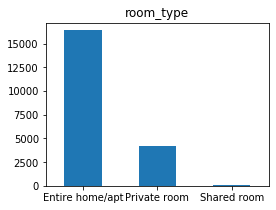

Entire home/apt    0.793357
Private room       0.202721
Shared room        0.003922
Name: room_type, dtype: float64


In [52]:
for col in ['property_type', 'room_type']:
    category_count_plot(col, figsize=(4,3))
    print(listings[col].value_counts(normalize=True))

Reviews

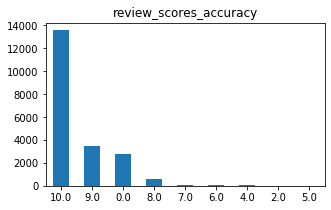

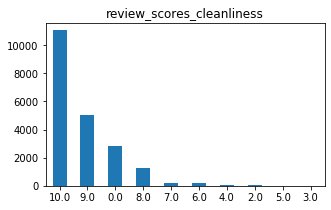

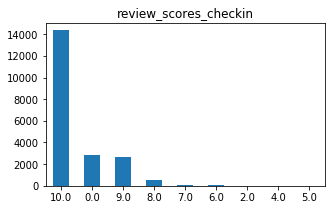

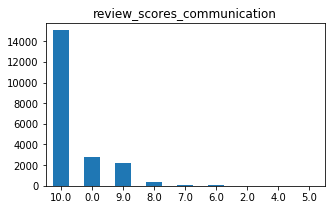

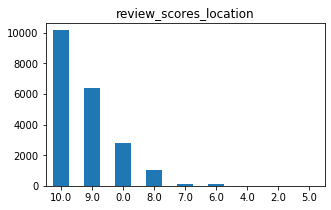

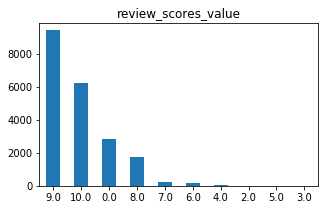

In [53]:
for col in list(listings.columns[listings.columns.str.startswith("review_scores") == True]):
    category_count_plot(col, figsize=(5,3))

In [54]:
def binary_count_and_price_plot(col, figsize=(8,3)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    listings.groupby(col).size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    listings.groupby(col).price.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price ($)')
    ax2.set_xlabel('')
    
    plt.show()

Superhosts

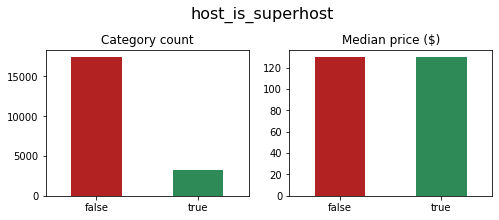

0    0.844485
1    0.155515
Name: host_is_superhost, dtype: float64


In [55]:
binary_count_and_price_plot('host_is_superhost')
print(listings.host_is_superhost.value_counts(normalize=True))

Host verification

In [56]:
listings.host_identity_verified.value_counts(normalize=True)

0    0.609712
1    0.390288
Name: host_identity_verified, dtype: float64

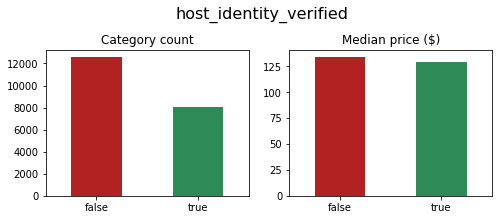

In [57]:
binary_count_and_price_plot('host_identity_verified')

Instant booking

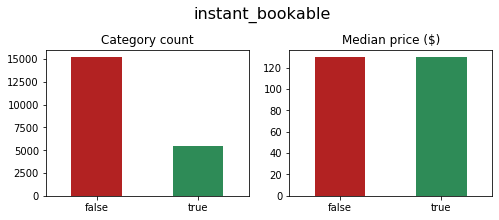

0    0.736371
1    0.263629
Name: instant_bookable, dtype: float64


In [58]:
binary_count_and_price_plot('instant_bookable')
print(listings.instant_bookable.value_counts(normalize=True))

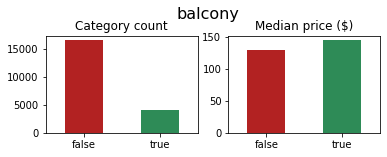

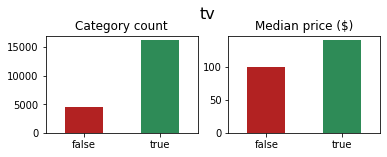

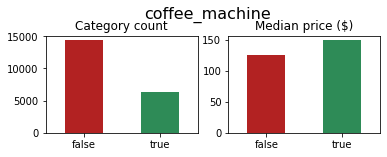

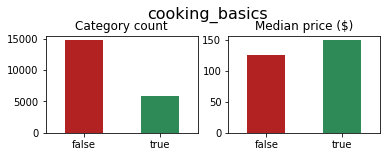

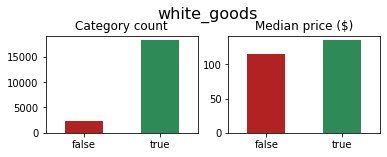

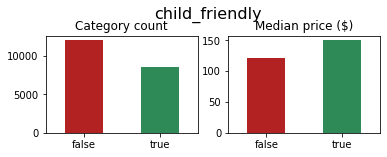

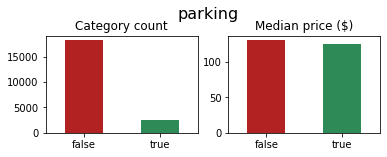

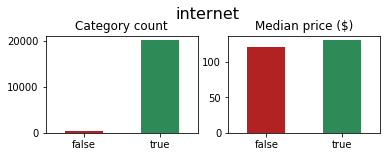

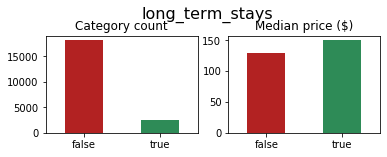

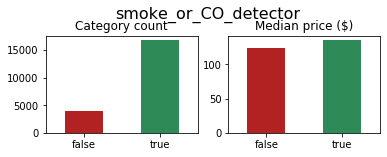

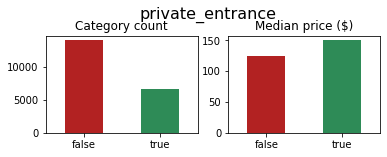

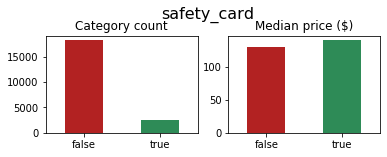

In [59]:
for col in listings.iloc[:,36:].columns:
    binary_count_and_price_plot(col, figsize=(6,2))

In [60]:
transformed_df = pd.get_dummies(listings)

In [61]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

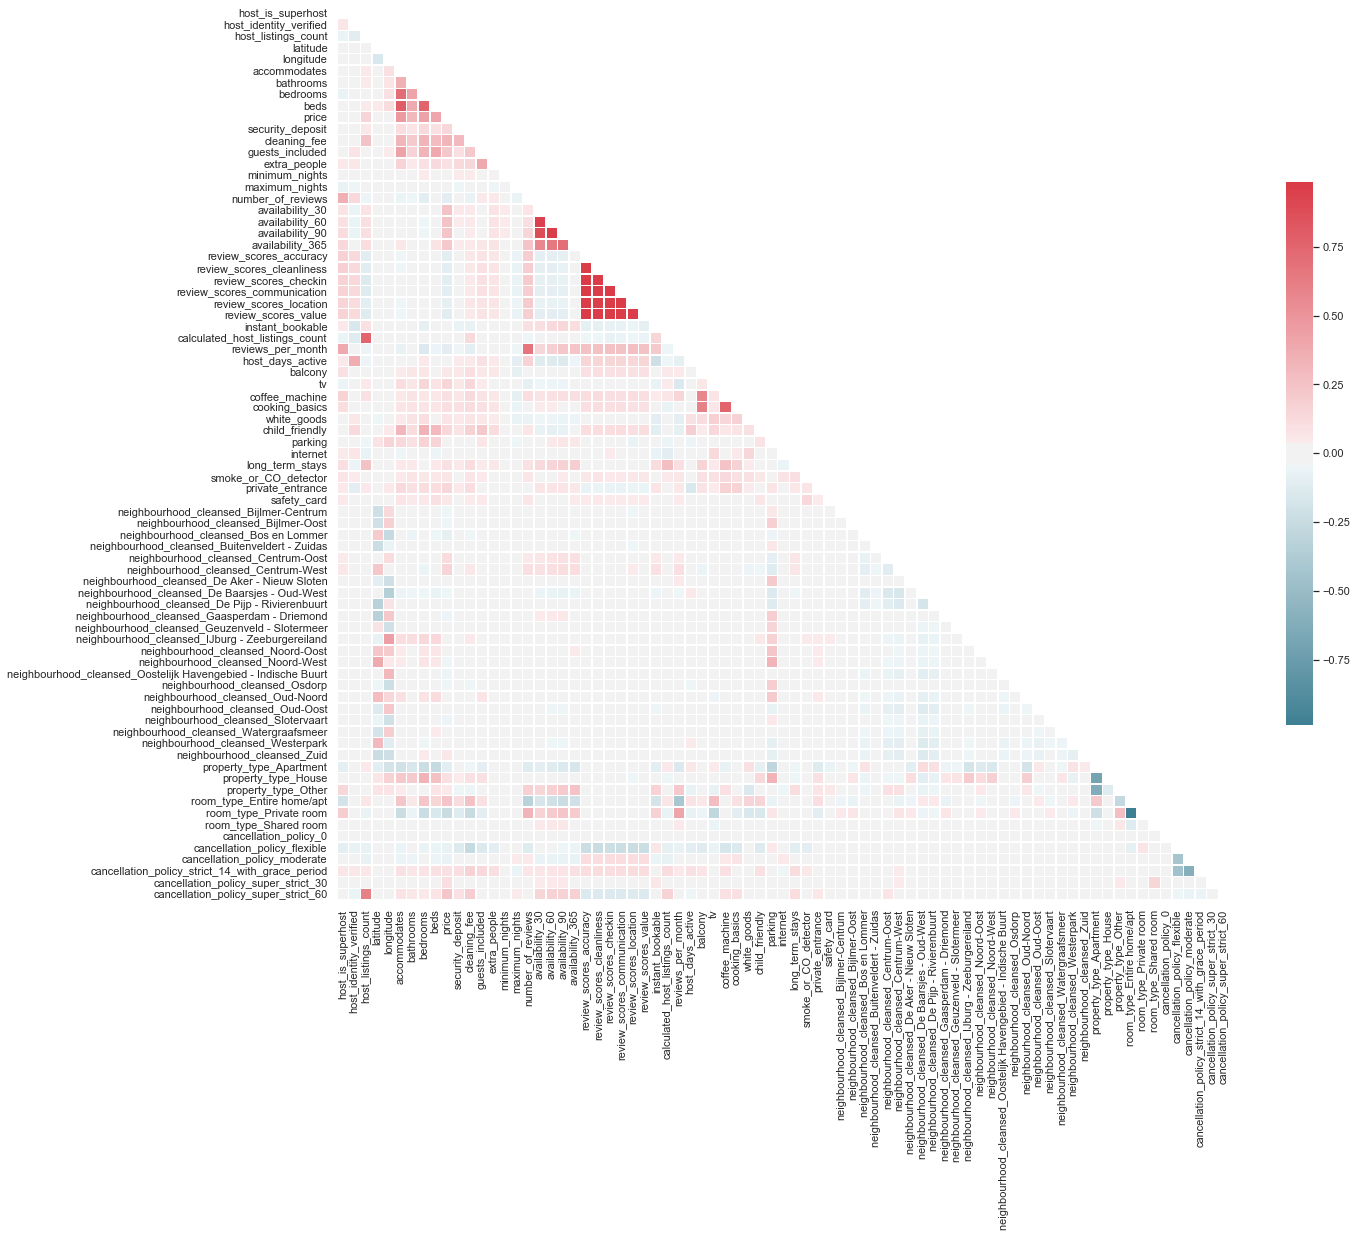

In [62]:
multi_collinearity_heatmap(transformed_df, figsize=(20,20))

In [63]:
transformed_df['security_deposit'].isna().sum()

0

In [64]:
transformed_df.corr()

,host_is_superhost,host_identity_verified,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,availability_30,availability_60,availability_90,availability_365,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,host_days_active,balcony,tv,coffee_machine,cooking_basics,white_goods,child_friendly,parking,internet,long_term_stays,smoke_or_CO_detector,private_entrance,safety_card,neighbourhood_cleansed_Bijlmer-Centrum,neighbourhood_cleansed_Bijlmer-Oost,neighbourhood_cleansed_Bos en Lommer,neighbourhood_cleansed_Buitenveldert - Zuidas,neighbourhood_cleansed_Centrum-Oost,neighbourhood_cleansed_Centrum-West,neighbourhood_cleansed_De Aker - Nieuw Sloten,neighbourhood_cleansed_De Baarsjes - Oud-West,neighbourhood_cleansed_De Pijp - Rivierenbuurt,neighbourhood_cleansed_Gaasperdam - Driemond,neighbourhood_cleansed_Geuzenveld - Slotermeer,neighbourhood_cleansed_IJburg - Zeeburgereiland,neighbourhood_cleansed_Noord-Oost,neighbourhood_cleansed_Noord-West,neighbourhood_cleansed_Oostelijk Havengebied - Indische Buurt,neighbourhood_cleansed_Osdorp,neighbourhood_cleansed_Oud-Noord,neighbourhood_cleansed_Oud-Oost,neighbourhood_cleansed_Slotervaart,neighbourhood_cleansed_Watergraafsmeer,neighbourhood_cleansed_Westerpark,neighbourhood_cleansed_Zuid,property_type_Apartment,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_0,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
host_is_superhost,1.000000,0.067209,-0.055586,0.014247,0.004184,-0.023690,-0.003562,-0.064680,-0.020387,0.002343,0.011029,-0.011335,0.036581,0.048656,-0.002281,-0.064993,0.359686,0.076656,0.097252,0.119612,0.137101,0.169346,0.179100,0.166490,0.162266,0.160608,0.163646,0.049190,-0.062171,0.382009,0.048875,0.098614,-0.047481,0.162299,0.111366,0.001272,0.004172,0.004824,0.041651,0.102388,0.074613,0.051999,0.046316,-0.001859,0.002293,-0.017396,-0.008738,0.044206,0.057592,0.030265,-0.015803,-0.011217,0.027701,0.000012,-0.001055,0.000957,0.003684,-0.014533,0.008381,-0.000032,-0.017189,-0.000799,-0.019961,-0.021904,-0.021547,-0.092621,-0.014572,0.143752,-0.193117,0.196356,-0.011963,-0.002986,-0.089578,0.017268,0.067019,-0.007699,-0.029867
host_identity_verified,0.067209,1.000000,-0.111118,0.015870,-0.002840,0.013345,0.007627,0.022689,0.014239,-0.017813,0.032854,-0.004511,0.083036,0.058300,0.016166,-0.043065,0.130788,-0.057088,-0.061876,-0.058070,-0.015527,0.126115,0.125708,0.132655,0.128146,0.115334,0.128539,-0.152757,-0.120091,-0.006577,0.368537,0.006664,-0.008820,-0.006018,0.033820,0.057004,0.123607,-0.001223,0.061413,-0.047639,0.040196,-0.098279,0.023526,-0.025597,0.000679,0.007379,-0.010779,-0.019313,-0.019406,-0.016633,0.027014,0.004832,-0.003653,-0.009384,0.001799,-0.006683,-0.004726,0.004921,-0.022440,-0.000893,0.006629,0.002382,-0.002179,0.019654,-0.002941,0.018042,0.007431,-0.032960,0.005576,-0.003489,-0.013678,-0.005567,-0.070673,0.015091,0.055803,0.002386,-0.056374
host_listings_count,-0.055586,-0.111118,1.000000,0.000620,-0.007301,0.047058,0.039604,0.031874,0.045416,0.158684,0.058308,0.250640,-0.031206,-0.026199,-0.000093,0.021935,-0.047949,0.083882,0.099656,0.100529,0.112252,-0.112682,-0.111052,-0.127716,-0.120819,-0.106708,-0.119034,0.087360,0.759189,-0.051551,-0.053623,0.028926,0.050509,0.089401,0.009184,-0.015675,-0.017545,-0.042674,-0.064208,0.256639,0.029122,0.046990,0.003528,-0.010946,-0.009915,-0.009755,0.008398,0.037074,0.029188,-0.004805,-0.009409,0.010711,-0.011389,-0.006910,-0.011960,-0.015004,-0.011513,-0.017853,-0.012595,-0.010468,-0.003451,-0.016301,-0.003649,0.00257

From the correlation matrix we see a higher correlation between Accomodates and the dependent variable Price as well as between Bedrooms and Price. These indicate the - nonsurprising - relationship between the price of an accomodation and the number of people or bedrooms. The cleaning fee and extra people also impacts the price.

## Building a Model

**Model 1 - Linear Regression**

In [65]:
# Separating X and y
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

X = transformed_df.drop(['price','host_since'] ,axis=1)#dropping host_since as its datetime
y = transformed_df.price

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.20, random_state=2)

In [67]:
regr =LinearRegression()

In [68]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
pred = regr.predict(X_test)

In [70]:
pred

array([171.32435164,  88.23092366, 241.7640533 , ...,  96.86567646,
       100.30938223,  83.50701538])

In [71]:
regr.score(X_test, y_test)

0.4600196207143777

The model was only able to explain 46% of the variation in price. 

In [72]:
mse = mean_squared_error(y_test, pred)
mse


5504.901017234463

In [73]:
root_mse = mse**(1/2)
root_mse

74.19502016466107

Our RMSE is 74 dollars, meaning that our classifier is wrong by that much on average.

**Model 2- XGoost**

In [74]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
import time
from sklearn.metrics import confusion_matrix

In [75]:
from sklearn.preprocessing import MinMaxScaler

# Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))
y = scaler.fit_transform(y.values.reshape(-1,1))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [76]:
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Test MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Test r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

[19:12:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time taken to run: 0.1 minutes

Training MSE: 0.0011
Test MSE: 0.0012

Training r2: 0.5969
Test r2: 0.5377


In [77]:
pd.set_option('display.max_rows', None) # show all rows names display
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
neighbourhood_cleansed_Noord-West,0.000000
neighbourhood_cleansed_Noord-Oost,0.000000
neighbourhood_cleansed_IJburg - Zeeburgereiland,0.000000
neighbourhood_cleansed_Gaasperdam - Driemond,0.000000
neighbourhood_cleansed_De Baarsjes - Oud-West,0.000000
review_scores_value,0.000000
instant_bookable,0.000000
review_scores_accuracy,0.000000
neighbourhood_cleansed_De Aker - Nieuw Sloten,0.000000
neighbourhood_cleansed_Bos en Lommer,0.000000


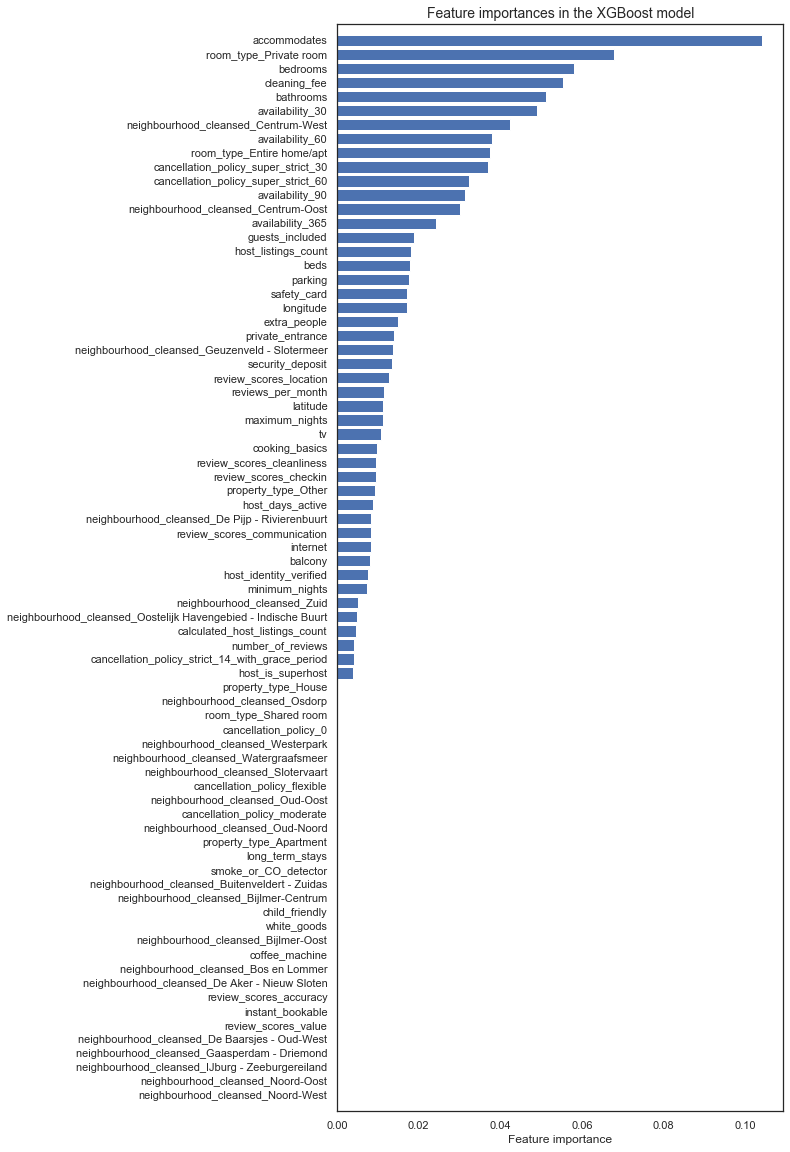

In [78]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

From the above  we can see the top 5 features that influence price are Accommodates, room_type_Private_room, bedrooms, cleaning_fee, bathrooms.

The model was only able to explain 60% of the variation in price. It is likely that a significant proportion of this unexplained variance is due to variations in the listing photos. The photos of properties on Airbnb are very important in encouraging guests to book, and so can also be expected to have a significant impact on price — better photos (primarily better quality properties and furnishings, but also better quality photography) equal higher prices.